#### Aquí encontrarás todo lo que necesitas saber: https://www.kaggle.com/t/ab8726f0cfc84544abbae69a6be88071

## Librerias

In [1]:
import pandas as pd
import numpy as np
import urllib.request
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Funciones
import os
import sys
utils_path = r'C:\Users\0205301\OneDrive - SENER\Documentos\GitHub\EDAMOTO\src\utils'
sys.path.append(utils_path)
from utils import *

In [3]:
# setwarnings
import warnings
warnings.filterwarnings('ignore')

## Data

In [4]:
### Para que funcione necesitas bajarte los archivos de datos de Kaggle 
train = pd.read_csv("data/train.csv")
test= pd.read_csv("data/test.csv")


## Data exploration

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    object 
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_euros       912 non-null    float64
dtypes: float64(2), int64(1), object(10)
memory usage: 92.8+ KB


In [6]:
test['laptop_ID'].isin(train['laptop_ID']).sum() 

0

In [7]:
# Concat train & test to df
train['source'] = 'train'
test['source'] = 'test'
df = pd.concat([train, test], axis=0).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       912 non-null    float64
 13  source            1303 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 142.6+ KB


In [8]:
# Verify that there is no duplicated laptop_ID
df.laptop_ID.duplicated().sum()

0

In [9]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,source
0,1104,Acer,Aspire ES1-523,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.4kg,387.0,train
1,114,Dell,XPS 13,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7560U 2.4GHz,8GB,256GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.23kg,1379.0,train
2,172,Acer,Aspire A517-51G,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Nvidia GeForce MX150,Windows 10,3kg,854.0,train
3,918,HP,Elitebook 820,Netbook,12.5,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.26kg,1483.0,train
4,447,Lenovo,IdeaPad 320-15AST,Notebook,17.3,1600x900,AMD A6-Series 9220 2.5GHz,8GB,1TB HDD,AMD Radeon R4,Windows 10,2.8kg,519.0,train


## Data processing

In [10]:
df['Product'].unique()

array(['Aspire ES1-523', 'XPS 13', 'Aspire A517-51G', 'Elitebook 820',
       'IdeaPad 320-15AST', 'IdeaPad 500-15ISK', 'IdeaPad 520S-14IKB',
       'Pavilion 14-BK001nv', 'Omen 17-w212nv', 'Rog GL553VE-FY052T',
       'Latitude 3180', 'Yoga 720-13IKB', 'IdeaPad 320-15IKBN',
       'Mi Notebook', 'EliteBook 850', 'Aspire ES1-531', 'MacBook 12"',
       'Latitude E5570', 'XPS 15', 'Alienware 17', 'Inspiron 7567',
       'B51-80 (i7-6500U/8GB/1008GB/Radeon', 'Spectre 13-V111dx',
       'Inspiron 3567', 'Spectre Pro', 'Latitude 7480', 'ProBook 440',
       'Swift 3', 'Latitude 5480',
       'X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce', 'EliteBook x360',
       'Notebook Odyssey', 'Precision 3520', 'ThinkPad L470',
       'Probook 450', 'Aspire 5', 'Rog GL753VE-GC070T', 'Blade Pro',
       'Chromebook 14', 'Chromebook Flip', 'Tecra Z50-C-144',
       'Insprion 5767', 'Macbook Air', '250 G6',
       'E402WA-GA007T (E2-6110/4GB/64GB/W10', 'VivoBook S14',
       'Latitude 5590', 'Yoga 900-13IS

In [11]:
# Hay que limpiar el campo. Tiene mezcla de otros campos.
df[df['Product'].str.contains('\(')]

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,source
23,1276,Lenovo,B51-80 (i7-6500U/8GB/1008GB/Radeon,Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,1.0TB Hybrid,AMD Radeon R5 M330,Windows 7,2.32kg,895.00,train
32,1287,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,720.32,train
49,130,Asus,E402WA-GA007T (E2-6110/4GB/64GB/W10,Notebook,14.0,1366x768,AMD E-Series 6110 1.5GHz,4GB,64GB SSD,AMD Radeon R2,Windows 10 S,1.65kg,277.99,train
53,1315,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,720.32,train
67,601,Lenovo,V320-17ISK (i3-6006U/4GB/500GB/FHD/No,Notebook,17.3,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,No OS,2.8kg,529.00,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,104,HP,15-bw000nv (E2-9000e/4GB/500GB/Radeon,Notebook,15.6,Full HD 1920x1080,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,Windows 10,2.1kg,NaN,test
1281,565,HP,15-bw007nv (A10-9620P/6GB/128GB/Radeon,Notebook,15.6,IPS Panel Full HD 1920x1080,AMD A10-Series A10-9620P 2.5GHz,6GB,128GB SSD,AMD Radeon 530,Windows 10,1.91kg,NaN,test
1285,1145,HP,15-bs078cl (i7-7500U/8GB/2TB/W10),Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,2TB HDD,Intel HD Graphics 620,Windows 10,2.04kg,NaN,test
1286,1190,Asus,X553SA-XX021T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,NaN,test


In [12]:
df.loc[df['Product'].str.contains('\('),'Product']=df.loc[df['Product'].str.contains('\('),'Product'].apply(lambda x: x.split('(')[0])

In [13]:
sorted(df.Product.unique())

['110-15ACL ',
 '14-am079na ',
 '15-AC110nv ',
 '15-AY023na ',
 '15-BA015wm ',
 '15-BS026nv ',
 '15-BS028nv ',
 '15-BS078nr ',
 '15-BS101nv ',
 '15-BS103nv ',
 '15-BW004nv ',
 '15-BW037na ',
 '15-BW091ND ',
 '15-BW094nd ',
 '15-ay047nv ',
 '15-ba043na ',
 '15-bs002nv ',
 '15-bs005nv ',
 '15-bs011nv ',
 '15-bs012nv ',
 '15-bs015dx ',
 '15-bs017nv ',
 '15-bs018nq ',
 '15-bs023nv ',
 '15-bs024nv ',
 '15-bs025nv ',
 '15-bs053od ',
 '15-bs078cl ',
 '15-bs190od ',
 '15-bw000nv ',
 '15-bw002nv ',
 '15-bw003nv ',
 '15-bw007nv ',
 '15-bw009nv ',
 '15-bw011nv ',
 '15-cb003na ',
 '15-cd005nv ',
 '15-ra044nv ',
 '15-rb013nv ',
 '17-AK091ND ',
 '17-BS037cl ',
 '17-BS092ND ',
 '17-X047na ',
 '17-Y002nv ',
 '17-ak001nv ',
 '17-ak002nv ',
 '17-bs000nv I3',
 '17-bs001nv ',
 '250 G4',
 '250 G5',
 '250 G6',
 '255 G6',
 '320-15ISK ',
 'A541NA-GO342 ',
 'A715-71G-59DH ',
 'Alienware 15',
 'Alienware 17',
 'Aspire 1',
 'Aspire 3',
 'Aspire 5',
 'Aspire 7',
 'Aspire A315-31',
 'Aspire A315-51',
 'Aspire A515

In [14]:
df['Product']=df.Product.apply(lambda x: x.split()[0]).apply(lambda x: x.split('-')[0])

In [15]:
sorted(df.ScreenResolution.unique())

['1366x768',
 '1440x900',
 '1600x900',
 '1920x1080',
 '2560x1440',
 '4K Ultra HD / Touchscreen 3840x2160',
 '4K Ultra HD 3840x2160',
 'Full HD / Touchscreen 1920x1080',
 'Full HD 1920x1080',
 'IPS Panel 1366x768',
 'IPS Panel 2560x1440',
 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
 'IPS Panel 4K Ultra HD 3840x2160',
 'IPS Panel Full HD / Touchscreen 1920x1080',
 'IPS Panel Full HD 1366x768',
 'IPS Panel Full HD 1920x1080',
 'IPS Panel Full HD 1920x1200',
 'IPS Panel Full HD 2160x1440',
 'IPS Panel Full HD 2560x1440',
 'IPS Panel Quad HD+ / Touchscreen 3200x1800',
 'IPS Panel Quad HD+ 2560x1440',
 'IPS Panel Quad HD+ 3200x1800',
 'IPS Panel Retina Display 2304x1440',
 'IPS Panel Retina Display 2560x1600',
 'IPS Panel Retina Display 2736x1824',
 'IPS Panel Retina Display 2880x1800',
 'IPS Panel Touchscreen / 4K Ultra HD 3840x2160',
 'IPS Panel Touchscreen 1366x768',
 'IPS Panel Touchscreen 1920x1200',
 'IPS Panel Touchscreen 2400x1600',
 'IPS Panel Touchscreen 2560x1440',
 'Quad HD

In [16]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df[['Res_x','Res_y']] = df.ScreenResolution.str.extract(r'(\d+)x(\d+)')
df.drop('ScreenResolution',axis=1,inplace=True)
df[['Res_x','Res_y']] = df[['Res_x','Res_y']].astype(int)
df['PPI'] = (((df['Res_x']**2) + (df['Res_y']**2))**0.5/df['Inches']).astype('float')

In [17]:
df['GHz'] = df['Cpu'].apply(lambda x: x.split(' ')[-1]).str.replace('GHz','')
df['GHz'] = df['GHz'].astype(float)

In [18]:
df['Cpu']=df['Cpu'].apply(lambda x: x.replace(x.split()[-1], '')).str.strip()

In [19]:
sorted(df['Cpu'].unique().tolist())

['AMD A10-Series 9600P',
 'AMD A10-Series 9620P',
 'AMD A10-Series A10-9620P',
 'AMD A12-Series 9700P',
 'AMD A12-Series 9720P',
 'AMD A4-Series 7210',
 'AMD A6-Series 7310',
 'AMD A6-Series 9220',
 'AMD A6-Series A6-9220',
 'AMD A8-Series 7410',
 'AMD A9-Series 9410',
 'AMD A9-Series 9420',
 'AMD A9-Series A9-9420',
 'AMD E-Series 6110',
 'AMD E-Series 7110',
 'AMD E-Series 9000',
 'AMD E-Series 9000e',
 'AMD E-Series E2-6110',
 'AMD E-Series E2-9000',
 'AMD E-Series E2-9000e',
 'AMD FX 8800P',
 'AMD FX 9830P',
 'AMD Ryzen 1600',
 'AMD Ryzen 1700',
 'Intel Atom X5-Z8350',
 'Intel Atom Z8350',
 'Intel Atom x5-Z8300',
 'Intel Atom x5-Z8350',
 'Intel Atom x5-Z8550',
 'Intel Celeron Dual Core 3205U',
 'Intel Celeron Dual Core 3855U',
 'Intel Celeron Dual Core N3050',
 'Intel Celeron Dual Core N3060',
 'Intel Celeron Dual Core N3350',
 'Intel Celeron Quad Core N3160',
 'Intel Celeron Quad Core N3450',
 'Intel Celeron Quad Core N3710',
 'Intel Core M',
 'Intel Core M 6Y30',
 'Intel Core M 6

In [20]:
df['Cpu_model'] = df['Cpu'].apply(lambda x: x.split()[-1])

In [21]:
df.apply(lambda row: row['Cpu'].replace(row['Cpu_model'], ''), axis=1).str.split()
df['Cpu_brand'] = df.apply(lambda row: row['Cpu'].replace(row['Cpu_model'], ''), axis=1).str.split().apply(lambda x: x[0]).str.strip()
df['Cpu_series'] =df.apply(lambda row: row['Cpu'].replace(row['Cpu_model'], '').replace(row['Cpu_brand'], ''), axis=1).str.strip()


In [22]:
del df['Cpu']

In [23]:
df['Ram_GB'] = df['Ram'].apply(lambda x: x.replace('GB',''))
df['Ram_GB'] = df['Ram_GB'].astype(int)
del df['Ram'] 

In [24]:
df.Memory.unique().tolist()

['500GB HDD',
 '256GB SSD',
 '512GB SSD',
 '1TB HDD',
 '1.0TB Hybrid',
 '128GB SSD +  1TB HDD',
 '256GB SSD +  1TB HDD',
 '128GB SSD',
 '256GB SSD +  500GB HDD',
 '256GB Flash Storage',
 '512GB SSD +  1TB HDD',
 '32GB Flash Storage',
 '64GB Flash Storage',
 '64GB SSD',
 '512GB SSD +  256GB SSD',
 '1TB SSD',
 '180GB SSD',
 '128GB SSD +  2TB HDD',
 '128GB Flash Storage',
 '2TB HDD',
 '1TB HDD +  1TB HDD',
 '32GB SSD',
 '16GB Flash Storage',
 '256GB SSD +  256GB SSD',
 '512GB SSD +  2TB HDD',
 '16GB SSD',
 '256GB SSD +  2TB HDD',
 '512GB Flash Storage',
 '508GB Hybrid',
 '64GB Flash Storage +  1TB HDD',
 '512GB SSD +  512GB SSD',
 '1TB SSD +  1TB HDD',
 '32GB HDD',
 '8GB SSD',
 '128GB HDD',
 '512GB SSD +  1.0TB Hybrid',
 '256GB SSD +  1.0TB Hybrid',
 '1.0TB HDD',
 '240GB SSD']

In [25]:
df['Memory'].unique().tolist()


['500GB HDD',
 '256GB SSD',
 '512GB SSD',
 '1TB HDD',
 '1.0TB Hybrid',
 '128GB SSD +  1TB HDD',
 '256GB SSD +  1TB HDD',
 '128GB SSD',
 '256GB SSD +  500GB HDD',
 '256GB Flash Storage',
 '512GB SSD +  1TB HDD',
 '32GB Flash Storage',
 '64GB Flash Storage',
 '64GB SSD',
 '512GB SSD +  256GB SSD',
 '1TB SSD',
 '180GB SSD',
 '128GB SSD +  2TB HDD',
 '128GB Flash Storage',
 '2TB HDD',
 '1TB HDD +  1TB HDD',
 '32GB SSD',
 '16GB Flash Storage',
 '256GB SSD +  256GB SSD',
 '512GB SSD +  2TB HDD',
 '16GB SSD',
 '256GB SSD +  2TB HDD',
 '512GB Flash Storage',
 '508GB Hybrid',
 '64GB Flash Storage +  1TB HDD',
 '512GB SSD +  512GB SSD',
 '1TB SSD +  1TB HDD',
 '32GB HDD',
 '8GB SSD',
 '128GB HDD',
 '512GB SSD +  1.0TB Hybrid',
 '256GB SSD +  1.0TB Hybrid',
 '1.0TB HDD',
 '240GB SSD']

In [26]:
df['Memory']=df['Memory'].apply(lambda x: x.replace('Flash Storage','FS'))

In [27]:
df['Memory']=df['Memory'].apply(lambda x: x.split('+')).apply(lambda y: y+[None] if len(y) == 1 else y)

In [28]:
Disk1=df['Memory'].apply(lambda x: x[0].split())

In [29]:
Disk2=df['Memory'].apply(lambda x: x[1].split() if x[1] else None)

In [30]:
def calc_Mem_GB(Disk):
    lstM=pd.DataFrame()
    for lst in Disk:
        if lst:
            M=lst[0].replace('GB','')
            if lst[0].endswith('TB'):
                M=lst[0].replace('TB','')
                M=float(M)*1024
            lstM = pd.concat([lstM, pd.Series([float(M)])])
        else:
            lstM = pd.concat([lstM, pd.Series([None])])
    return lstM

In [31]:
M1=calc_Mem_GB(Disk1)
M2=calc_Mem_GB(Disk2)
D1=Disk1.apply(lambda x: x[1]+str(1) if x else None)
D2=Disk2.apply(lambda x: x[1]+str(2) if x else None)

In [32]:
df['M1']=M1.values
df['M2']=M2.values


In [33]:
df['D1']=D1.values
df['D2']=D2.values

In [34]:
for i, row in df.iterrows():
    col = row['D1']
    value = row['M1']
    if col:
        df.at[i, col] = value


In [35]:
for i, row in df.iterrows():
    col = row['D2']
    value = row['M2']
    if col:
        df.at[i, col] = value

In [36]:
df.fillna(0, inplace=True)

In [37]:
df.drop(['M1'], axis=1, inplace=True)
df.drop(['M2'], axis=1, inplace=True)
df.drop(['D1'], axis=1, inplace=True)
df.drop(['D2'], axis=1, inplace=True)
df.drop(['Memory'], axis=1, inplace=True)

In [38]:
df

,laptop_ID,Company,Product,TypeName,Inches,Gpu,OpSys,Weight,Price_euros,source,...,Cpu_brand,Cpu_series,Ram_GB,HDD1,SSD1,Hybrid1,FS1,HDD2,SSD2,Hybrid2
0,1104,Acer,Aspire,Notebook,15.6,AMD Radeon R5,Windows 10,2.4kg,387.0,train,...,AMD,A8-Series,4,500.0,0.0,0.0,0.0,0.0,0.0,0.0
1,114,Dell,XPS,Ultrabook,13.3,Intel Iris Plus Graphics 640,Windows 10,1.23kg,1379.0,train,...,Intel,Core i7,8,0.0,256.0,0.0,0.0,0.0,0.0,0.0
2,172,Acer,Aspire,Notebook,17.3,Nvidia GeForce MX150,Windows 10,3kg,854.0,train,...,Intel,Core i5,8,0.0,256.0,0.0,0.0,0.0,0.0,0.0
3,918,HP,Elitebook,Netbook,12.5,Intel HD Graphics 620,Windows 10,1.26kg,1483.0,train,...,Intel,Core i7,8,0.0,512.0,0.0,0.0,0.0,0.0,0.0
4,447,Lenovo,IdeaPad,Notebook,17.3,AMD Radeon R4,Windows 10,2.8kg,519.0,train,...,AMD,A6-Series,8,1024.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,693,Dell,Alienware,Gaming,15.6,Nvidia GeForce GTX 1070,Windows 10,3.49kg,0.0,test,...,Intel,Core i7,16,0.0,256.0,0.0,0.0,1024.0,0.0,0.0
1299,1132,Razer,Blade,Ultrabook,12.5,Intel HD Graphics 520,Windows 10,1.25kg,0.0,test,...,Intel,Core i7,8,0.0,256.0,0.0,0.0,0.0,0.0,0.0
1300,49,Dell,Inspiron,Notebook,15.6,AMD Radeon R5 M430,Windows 10,2.3kg,0.0,test,...,Intel,Core i5,4,0.0,256.0,0.0,0.0,0.0,0.0,0.0
1301,1243,Asus,X540SA,Notebook,15.6,Intel HD Graphics 405,Windows 10,2.65kg,0.0,test,...,Intel,Pentium Quad Core,4,1024.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
lstprocessors = sorted(df['Gpu'].value_counts().keys().to_list())

In [40]:
lstprocessors

['AMD FirePro W4190M',
 'AMD FirePro W4190M ',
 'AMD FirePro W5130M',
 'AMD FirePro W6150M',
 'AMD R17M-M1-70',
 'AMD R4 Graphics',
 'AMD Radeon 520',
 'AMD Radeon 530',
 'AMD Radeon 540',
 'AMD Radeon Pro 455',
 'AMD Radeon Pro 555',
 'AMD Radeon Pro 560',
 'AMD Radeon R2',
 'AMD Radeon R2 Graphics',
 'AMD Radeon R3',
 'AMD Radeon R4',
 'AMD Radeon R4 Graphics',
 'AMD Radeon R5',
 'AMD Radeon R5 430',
 'AMD Radeon R5 520',
 'AMD Radeon R5 M315',
 'AMD Radeon R5 M330',
 'AMD Radeon R5 M420',
 'AMD Radeon R5 M420X',
 'AMD Radeon R5 M430',
 'AMD Radeon R7',
 'AMD Radeon R7 Graphics',
 'AMD Radeon R7 M360',
 'AMD Radeon R7 M365X',
 'AMD Radeon R7 M440',
 'AMD Radeon R7 M445',
 'AMD Radeon R7 M460',
 'AMD Radeon R7 M465',
 'AMD Radeon R9 M385',
 'AMD Radeon RX 540',
 'AMD Radeon RX 550',
 'AMD Radeon RX 560',
 'AMD Radeon RX 580',
 'ARM Mali T860 MP4',
 'Intel Graphics 620',
 'Intel HD Graphics',
 'Intel HD Graphics 400',
 'Intel HD Graphics 405',
 'Intel HD Graphics 500',
 'Intel HD Graph

In [41]:
cambios1 = {
    'Nvidia GTX 980 SLI': 'Nvidia GeForce_GTX 980SLI',
    ' GTX ': '_GTX ',
    ' MX ': 'MX ',
    'MX ': 'MX ',
    '<U+039C>': '',
    'GT 940MX': 'GT940MX',
    'AMD R17M-M1-70': 'AMD Radeon Pro 5500M',
    'Radeon R': 'Radeon_R',
    'Radeon Pro': 'Radeon_Pro',
    'Radeon MX': 'Radeon_MX',
    'GeForce GTX1060':'GeForce_GTX 1060',
    'GeForce GT9':'GeForce GT 9',
    '1050 Ti':'1050Ti',
    'GeForce GT':'GeForce_GT',
    'AMD R4 Graphics':'AMD Radeon_R4 Graphics',
    'Mali T860':'Mali_T860',
    'GeForce MX':'GeForce_MX ',
     'GeForce_GTX1050Ti':'GeForce_GTX 1050Ti',
    'GeForce_GTX1080':'GeForce_GTX 1080',
   
   
}

In [42]:
# Aplicar transformaciones y construir un diccionario
lstprocessors1 = []
for x in lstprocessors:
    for key, value in cambios1.items():
        x = x.replace(key, value)
    x = x.strip()
    lstprocessors1.append(x)

In [43]:
lstprocessors1

['AMD FirePro W4190M',
 'AMD FirePro W4190M',
 'AMD FirePro W5130M',
 'AMD FirePro W6150M',
 'AMD Radeon_Pro 5500M',
 'AMD Radeon_R4 Graphics',
 'AMD Radeon 520',
 'AMD Radeon 530',
 'AMD Radeon 540',
 'AMD Radeon_Pro 455',
 'AMD Radeon_Pro 555',
 'AMD Radeon_Pro 560',
 'AMD Radeon_R2',
 'AMD Radeon_R2 Graphics',
 'AMD Radeon_R3',
 'AMD Radeon_R4',
 'AMD Radeon_R4 Graphics',
 'AMD Radeon_R5',
 'AMD Radeon_R5 430',
 'AMD Radeon_R5 520',
 'AMD Radeon_R5 M315',
 'AMD Radeon_R5 M330',
 'AMD Radeon_R5 M420',
 'AMD Radeon_R5 M420X',
 'AMD Radeon_R5 M430',
 'AMD Radeon_R7',
 'AMD Radeon_R7 Graphics',
 'AMD Radeon_R7 M360',
 'AMD Radeon_R7 M365X',
 'AMD Radeon_R7 M440',
 'AMD Radeon_R7 M445',
 'AMD Radeon_R7 M460',
 'AMD Radeon_R7 M465',
 'AMD Radeon_R9 M385',
 'AMD Radeon_RX 540',
 'AMD Radeon_RX 550',
 'AMD Radeon_RX 560',
 'AMD Radeon_RX 580',
 'ARM Mali_T860 MP4',
 'Intel Graphics 620',
 'Intel HD Graphics',
 'Intel HD Graphics 400',
 'Intel HD Graphics 405',
 'Intel HD Graphics 500',
 'In

In [44]:
lstprocessors2=[x + " ·"  if x in([ 'Intel Iris Pro Graphics','Intel HD Graphics','AMD Radeon_R2','AMD Radeon_R4','AMD Radeon_R5','AMD Radeon_R7']) else x for x in lstprocessors1]

In [45]:
dictGPu=dict(zip(lstprocessors,lstprocessors2))
df['Gpu']=df['Gpu'].map(dictGPu)


In [46]:
df['Gpu_brand']=df['Gpu'].apply(lambda x: x.split()[0])
df['Gpu_series']=df['Gpu'].apply(lambda x: " ".join(x.split()[1:-1]))
df['Gpu_model']=df['Gpu'].apply(lambda x: x.split()[-1])


In [47]:
df['Weight']=df['Weight'].apply(lambda x: x.replace('kg',''))
df['Weight']=df['Weight'].astype(float)

In [48]:
df

,laptop_ID,Company,Product,TypeName,Inches,Gpu,OpSys,Weight,Price_euros,source,...,HDD1,SSD1,Hybrid1,FS1,HDD2,SSD2,Hybrid2,Gpu_brand,Gpu_series,Gpu_model
0,1104,Acer,Aspire,Notebook,15.6,AMD Radeon_R5 ·,Windows 10,2.40,387.0,train,...,500.0,0.0,0.0,0.0,0.0,0.0,0.0,AMD,Radeon_R5,·
1,114,Dell,XPS,Ultrabook,13.3,Intel Iris Plus Graphics 640,Windows 10,1.23,1379.0,train,...,0.0,256.0,0.0,0.0,0.0,0.0,0.0,Intel,Iris Plus Graphics,640
2,172,Acer,Aspire,Notebook,17.3,Nvidia GeForce_MX 150,Windows 10,3.00,854.0,train,...,0.0,256.0,0.0,0.0,0.0,0.0,0.0,Nvidia,GeForce_MX,150
3,918,HP,Elitebook,Netbook,12.5,Intel HD Graphics 620,Windows 10,1.26,1483.0,train,...,0.0,512.0,0.0,0.0,0.0,0.0,0.0,Intel,HD Graphics,620
4,447,Lenovo,IdeaPad,Notebook,17.3,AMD Radeon_R4 ·,Windows 10,2.80,519.0,train,...,1024.0,0.0,0.0,0.0,0.0,0.0,0.0,AMD,Radeon_R4,·
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,693,Dell,Alienware,Gaming,15.6,Nvidia GeForce_GTX 1070,Windows 10,3.49,0.0,test,...,0.0,256.0,0.0,0.0,1024.0,0.0,0.0,Nvidia,GeForce_GTX,1070
1299,1132,Razer,Blade,Ultrabook,12.5,Intel HD Graphics 520,Windows 10,1.25,0.0,test,...,0.0,256.0,0.0,0.0,0.0,0.0,0.0,Intel,HD Graphics,520
1300,49,Dell,Inspiron,Notebook,15.6,AMD Radeon_R5 M430,Windows 10,2.30,0.0,test,...,0.0,256.0,0.0,0.0,0.0,0.0,0.0,AMD,Radeon_R5,M430
1301,1243,Asus,X540SA,Notebook,15.6,Intel HD Graphics 405,Windows 10,2.65,0.0,test,...,1024.0,0.0,0.0,0.0,0.0,0.0,0.0,Intel,HD Graphics,405


In [49]:
del df['Gpu']

In [50]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [51]:
df['OpSys']=df['OpSys'].apply(cat_os)

In [52]:
df.duplicated().sum()

0

In [53]:
df.set_index('laptop_ID',inplace=True)

Product


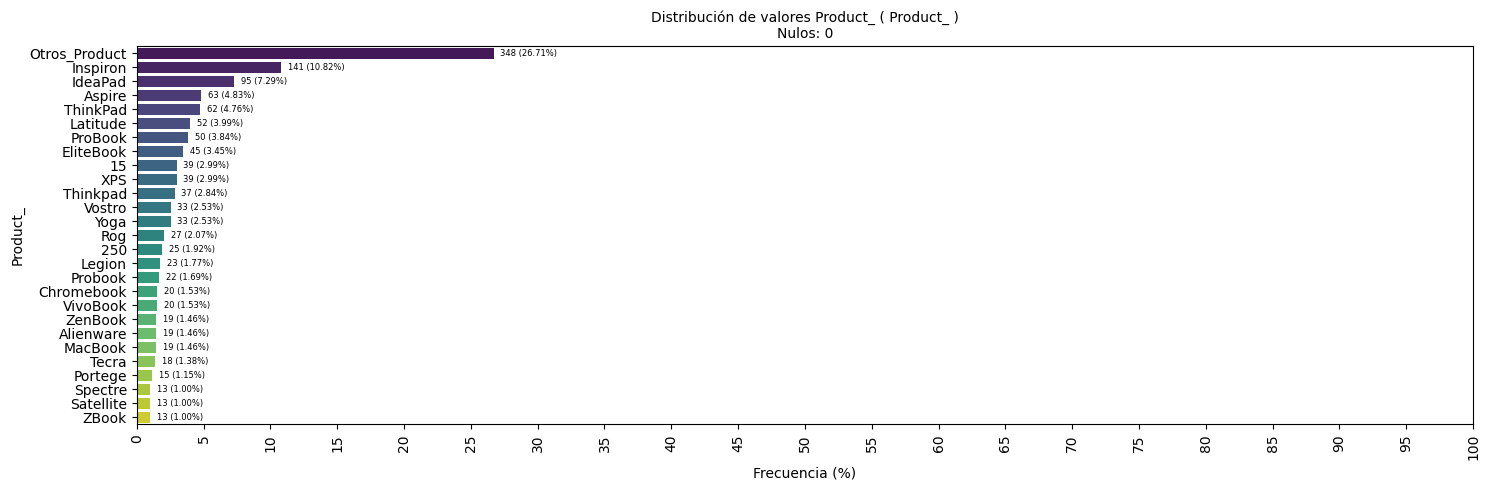

Cpu_brand


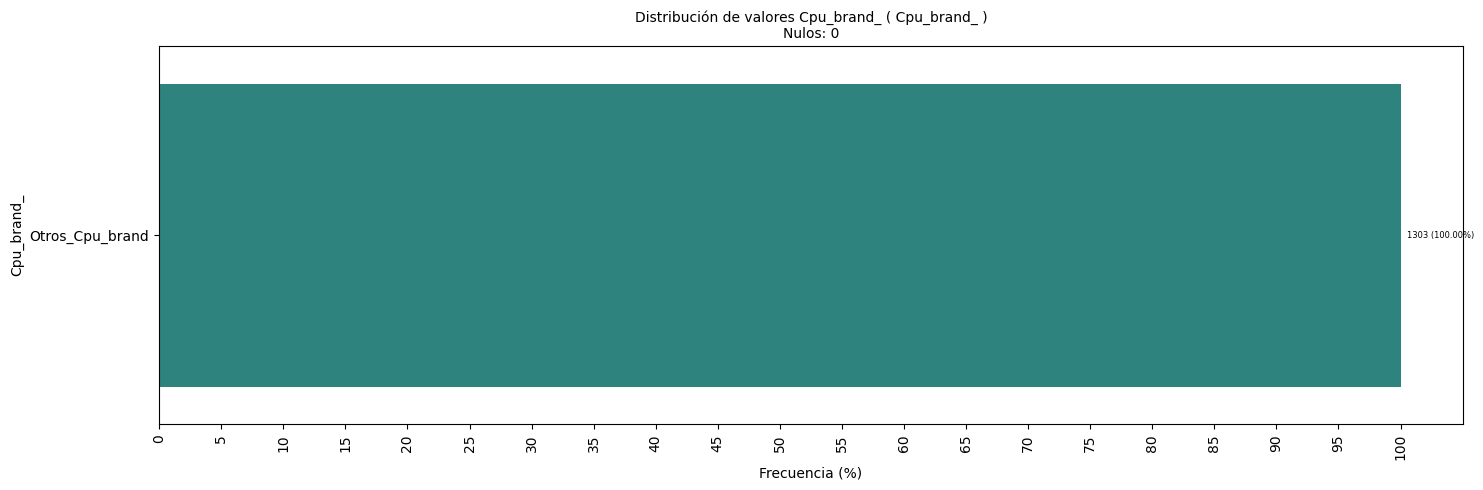

Gpu_brand


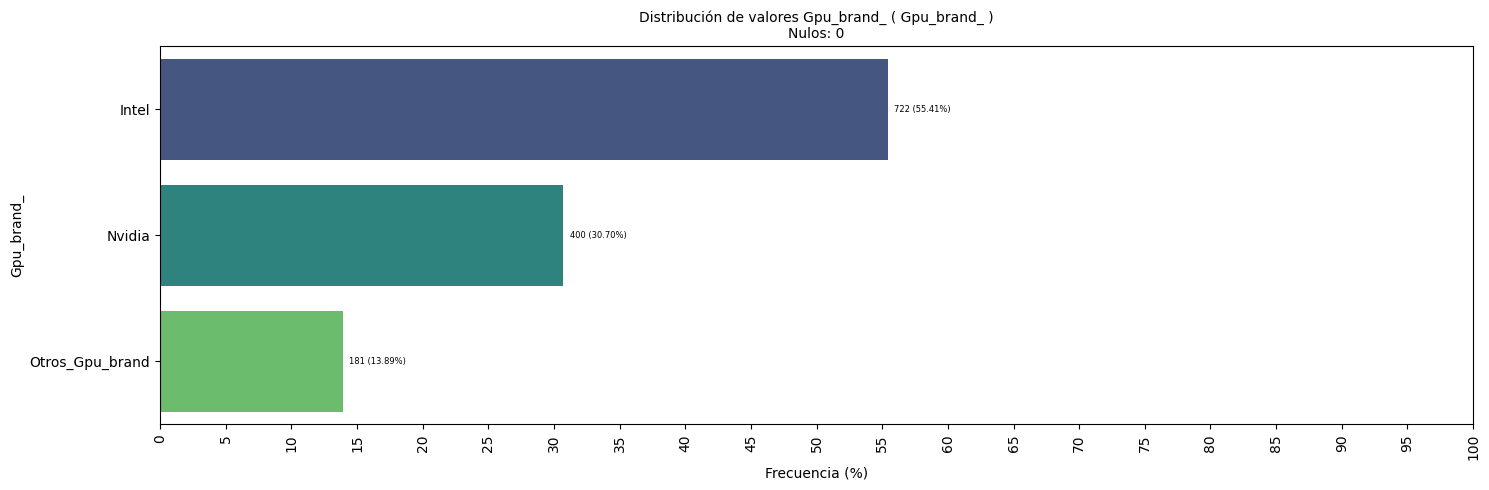

Gpu_series


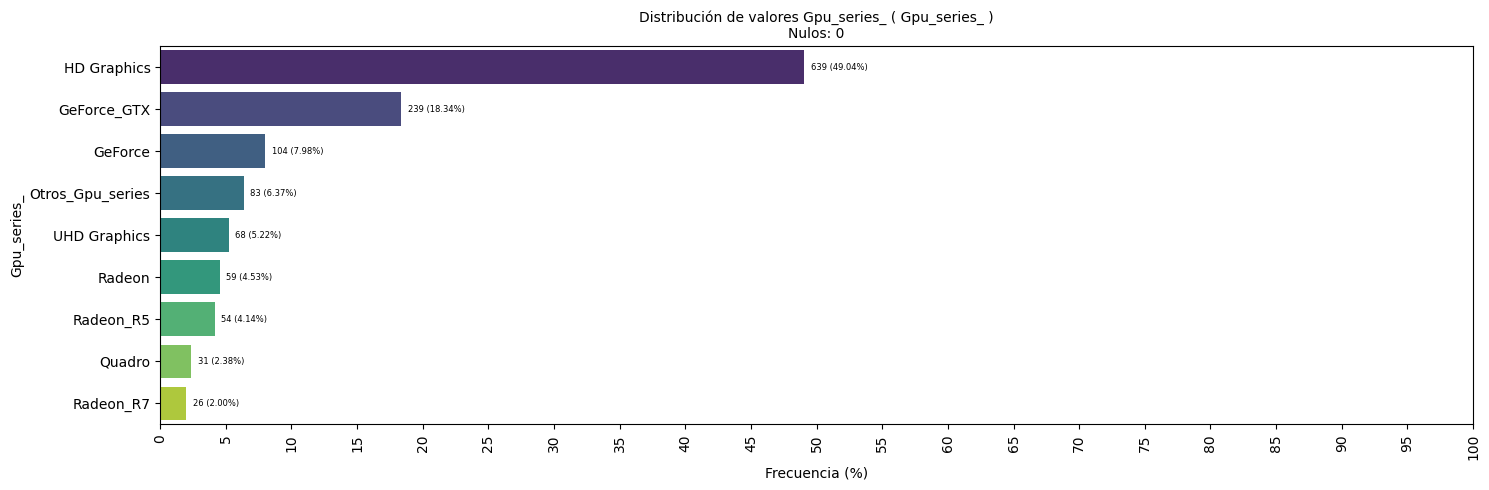

Gpu_model


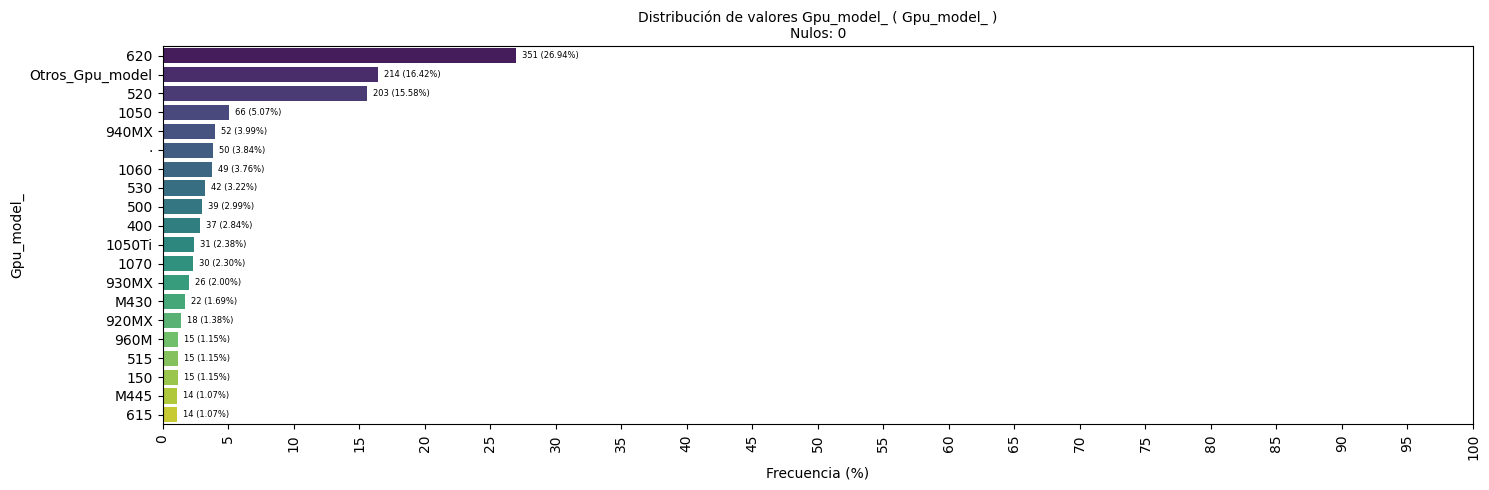

In [54]:
catcols=['Product','Cpu_brand','Gpu_brand','Gpu_series','Gpu_model']
for catcol in catcols:
    print(catcol)
    res=trf_col_pareto(df[catcol], umbral=0.95, sufijo='_', valor_defecto=f'Otros_{catcol}', valores_no_reemplazar=['Sin Datos'], perc_min=0.0095)
    graf_no_nums(res,1)
    df[catcol]=res.values

In [55]:
target='Price_euros'
train_=df[df['source']=='train']
test_=df[df['source']=='test']
del train_['source']
del test_['source']
sample = pd.read_csv("data/sample_submission.csv")
y=train_[target]

In [56]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, StandardScaler

# Funciones de transformación
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp, validate=False)
scaler = StandardScaler()

# Pipeline de transformación
transform_pipeline = Pipeline([
    ('log', log_transformer),
    ('scaler', scaler)
])

# Aplicar el pipeline al conjunto de entrenamiento
y_t = pd.Series(transform_pipeline.fit_transform(y.values.reshape(-1, 1)).ravel(), index=y.index)

<Axes: xlabel='Price_euros', ylabel='Density'>

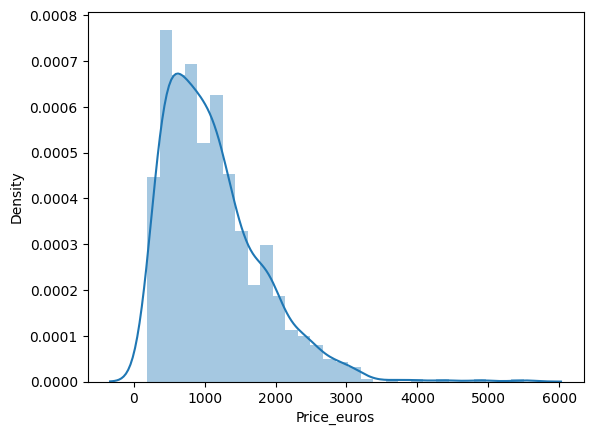

In [57]:
sns.distplot(y)

In [58]:
# Crear el pipeline inverso
reverse_transform_pipeline = Pipeline([
    ('inverse_scaler', FunctionTransformer(func=scaler.inverse_transform, validate=False)),
    ('inverse_log', FunctionTransformer(func=np.exp, inverse_func=np.log, validate=False))
])

# Aplicar la transformación inversa
y_original = pd.Series(reverse_transform_pipeline.transform(y_t.values.reshape(-1, 1)).ravel(), index=y.index)



<Axes: ylabel='Density'>

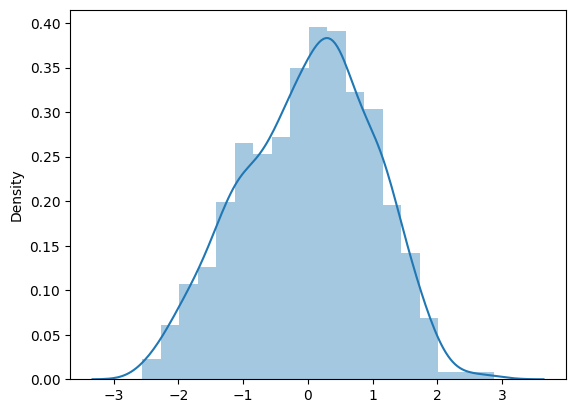

In [59]:
sns.distplot(y_t)

In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Definir las columnas categóricas y numéricas
columnas_categoricas = list(df_string_columns(train_))
columnas_numericas = list(df_numeric_columns(train_))
columnas_numericas.remove(target)  # Remove the target column

# Construir el transformador de columnas
transformador_columnas = ColumnTransformer(
    transformers=[
        ('categoricas',  OneHotEncoder(handle_unknown='ignore', drop='first'), columnas_categoricas),
        ('numericas', StandardScaler(), columnas_numericas)
    ])

# Construir el pipeline completo
pipeline = Pipeline([
    ('transformador_columnas', transformador_columnas)
])


In [61]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")


In [62]:
def reverse_transform(u, sIndex=None):
    if sIndex is None:
        sIndex = pd.Series(u)
    else:
        sIndex = pd.Series(u, index=sIndex.index)

    # Check if u is a NumPy array and convert it to a Pandas Series
    if isinstance(u, np.ndarray):
        u = pd.Series(u)

    pdserie = pd.Series(reverse_transform_pipeline.transform(u.values.reshape(-1, 1)).ravel(), index=sIndex.index)
    return pdserie


In [63]:
# Aplicar el pipeline al conjunto de datos
X = pipeline.fit_transform(train_)
Xtest = pipeline.transform(test_)

In [64]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


In [65]:
X_train, X_test, y_train, y_test_ = train_test_split(X, y_t, test_size = 0.20, random_state = 42)

#### Linear Regression

In [66]:
model = LinearRegression()


In [67]:
model.fit(X_train, y_train)
y_pred_ = model.predict(X_test)
y_pred=reverse_transform(y_pred_,y_test_)
y_test=reverse_transform(y_test_)
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))
model.fit(X, y_t)
y_pred_ = model.predict(Xtest)
y_pred=reverse_transform(y_pred_,test_)
submission = pd.DataFrame({"laptop_ID": y_pred.index, "Price_euros": y_pred})

RMSE : 368.9273356322011


In [68]:
submission.to_csv("LinearRegression2.csv", index=False)
chequeator(submission)

You're ready to submit!


#### Ridge Regression

In [69]:
model = Ridge(alpha=10)


In [70]:
model.fit(X_train, y_train)
y_pred_ = model.predict(X_test)
y_pred=reverse_transform(y_pred_,y_test_)
y_test=reverse_transform(y_test_)
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))
model.fit(X, y_t)
y_pred_ = model.predict(Xtest)
y_pred=reverse_transform(y_pred_,test_)
submission = pd.DataFrame({"laptop_ID": y_pred.index, "Price_euros": y_pred})

RMSE : 371.2790168293953


In [71]:
submission.to_csv("Ridge.csv", index=False)
chequeator(submission)

You're ready to submit!


#### Lasso Regression

In [72]:
model = Lasso(alpha=0.001)


In [73]:
model.fit(X_train, y_train)
y_pred_ = model.predict(X_test)
y_pred=reverse_transform(y_pred_,y_test_)
y_test=reverse_transform(y_test_)
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))
model.fit(X, y_t)
y_pred_ = model.predict(Xtest)
y_pred=reverse_transform(y_pred_,test_)
submission = pd.DataFrame({"laptop_ID": y_pred.index, "Price_euros": y_pred})

RMSE : 365.1362348221174


In [74]:
submission.to_csv("Lasso.csv", index=False)
chequeator(submission)

You're ready to submit!


#### Decission Tree

In [75]:
model =  DecisionTreeRegressor(max_depth=8)


In [76]:
model.fit(X_train, y_train)
y_pred_ = model.predict(X_test)
y_pred=reverse_transform(y_pred_,y_test_)
y_test=reverse_transform(y_test_)
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))
model.fit(X, y_t)
y_pred_ = model.predict(Xtest)
y_pred=reverse_transform(y_pred_,test_)
submission = pd.DataFrame({"laptop_ID": y_pred.index, "Price_euros": y_pred})

RMSE : 394.88264222967604


In [77]:
submission.to_csv(" Decission Tree.csv", index=False)
chequeator(submission)

You're ready to submit!


#### SVM

In [78]:
model = SVR(kernel='rbf',C=10000,epsilon=0.1)


In [79]:
model.fit(X_train, y_train)
y_pred_ = model.predict(X_test)
y_pred=reverse_transform(y_pred_,y_test_)
y_test=reverse_transform(y_test_)
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))
model.fit(X, y_t)
y_pred_ = model.predict(Xtest)
y_pred=reverse_transform(y_pred_,test_)
submission = pd.DataFrame({"laptop_ID": y_pred.index, "Price_euros": y_pred})

RMSE : 382.4998915739873


In [80]:
submission.to_csv("SVM.csv", index=False)
chequeator(submission)

You're ready to submit!


#### Random Forest

In [81]:
model = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)



In [82]:
model.fit(X_train, y_train)
y_pred_ = model.predict(X_test)
y_pred=reverse_transform(y_pred_,y_test_)
y_test=reverse_transform(y_test_)
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))
model.fit(X, y_t)
y_pred_ = model.predict(Xtest)
y_pred=reverse_transform(y_pred_,test_)
submission = pd.DataFrame({"laptop_ID": y_pred.index, "Price_euros": y_pred})

RMSE : 368.7770445142843


In [83]:
submission.to_csv("Random Forest.csv", index=False)
chequeator(submission)

You're ready to submit!


In [100]:
X

<912x191 sparse matrix of type '<class 'numpy.float64'>'
	with 21058 stored elements in Compressed Sparse Row format>

#### GradientBoost

In [84]:
model = GradientBoostingRegressor(n_estimators=500)

In [85]:
model.fit(X_train, y_train)
y_pred_ = model.predict(X_test)
y_pred=reverse_transform(y_pred_,y_test_)
y_test=reverse_transform(y_test_)
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))
model.fit(X, y_t)
y_pred_ = model.predict(Xtest)
y_pred=reverse_transform(y_pred_,test_)
submission = pd.DataFrame({"laptop_ID": y_pred.index, "Price_euros": y_pred})

RMSE : 349.51232835582624


In [86]:
submission.to_csv("GradientBoost.csv", index=False)
chequeator(submission)

You're ready to submit!


#### XGBoost

In [87]:
model =  XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

In [88]:
model.fit(X_train, y_train)
y_pred_ = model.predict(X_test)
y_pred=reverse_transform(y_pred_,y_test_)
y_test=reverse_transform(y_test_)
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))
model.fit(X, y_t)
y_pred_ = model.predict(Xtest)
y_pred=reverse_transform(y_pred_,test_)
submission = pd.DataFrame({"laptop_ID": y_pred.index, "Price_euros": y_pred})

RMSE : 366.56716403179774


In [90]:
submission.to_csv("XGBoost.csv", index=False)
chequeator(submission)

You're ready to submit!


In [ ]:
# divide in train test:



#### XGBoost2

In [137]:
X_train, X_test, y_train, y_test_ = train_test_split(Xout, yout, test_size = 0.20, random_state = 42)

In [138]:
model.fit(X_train, y_train)
y_pred_ = model.predict(X_test)
y_pred=reverse_transform(y_pred_,y_test_)
y_test=reverse_transform(y_test_)
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))
model.fit(Xout, yout)
y_pred_ = model.predict(Xtest)
y_pred=reverse_transform(y_pred_,test_)
submission = pd.DataFrame({"laptop_ID": y_pred.index, "Price_euros": y_pred})

RMSE : 233.98478654216925


In [139]:
submission.to_csv("XGBoost2.csv", index=False)
chequeator(submission)

You're ready to submit!
